## Final project rated by pairs 

### Made by Freedel ZINSOU PLY

### Data description and main objective

The objective of this project is to evaluate the knowledge acquired during these courses on deep learning and reinforcement learning. My subject is on image recognition mainly on flower image recognition. The data are images of flowers. The objective is to implement a deep learning algorithm allowing to classify each flower image in the category which corresponds to it. The data contains 4323 flowers'image  for five catgeories are : Daysly flowers, Tulip flowers, sun flowers, dandedlion flowers and rose flowers. My research in this area shows that the most suitable and most used model for this kind of data is the Convolutional Neuronal Network. So the main objectif of analysis is to implement several CNN model and keep which is best. 

The data is available on kaggle 
https://www.kaggle.com/alxmamaev/flowers-recognition/data

In [3]:
import keras
from keras.datasets import reuters
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
import tensorflow as tf
from pathlib import Path
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [5]:
from tqdm import tqdm
import cv2  
import numpy as np
import random as rn
import seaborn as sns

In [6]:
import os
print(os.listdir((r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers')))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [7]:
X=[]
labels=[]
IMG_SIZE=150
daisy_flowers=r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers\daisy'
sun_flowers =r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers\sunflower'
tulip_flowers=r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers\tulip'
dandelion_flowers=r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers\dandelion'
rose_flowers=r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers\rose'

### Data visualization and description

In [8]:
input_path = Path('C:/Users/33758/Desktop/Freedel ZINSOU PLY/Coursera/flowers/')
folder_dir = input_path / 'flowers'
flower_types=os.listdir(r'C:\Users\33758\Desktop\Freedel ZINSOU PLY\Coursera\flowers\flowers')
flowers = []
for species in flower_types:
    # Get all the file names
    all_flowers = os.listdir(folder_dir / species)
    # Add them to the list
    for flower in all_flowers:
        flowers.append((species, str(folder_dir /species) + '/' + flower))

# Build a dataframe        
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
flowers.head()

category                                              image
0    daisy  C:\Users\33758\Desktop\Freedel ZINSOU PLY\Cour...
1    daisy  C:\Users\33758\Desktop\Freedel ZINSOU PLY\Cour...
2    daisy  C:\Users\33758\Desktop\Freedel ZINSOU PLY\Cour...
3    daisy  C:\Users\33758\Desktop\Freedel ZINSOU PLY\Cour...
4    daisy  C:\Users\33758\Desktop\Freedel ZINSOU PLY\Cour...

In [9]:
print("Total number of flowers in the dataset: ", len(flowers))
fl_count = flowers['category'].value_counts()
print("Flowers in each category: ")
print(fl_count)

Total number of flowers in the dataset:  4326
Flowers in each category: 
dandelion    1055
tulip         984
rose          784
daisy         769
sunflower     734
Name: category, dtype: int64


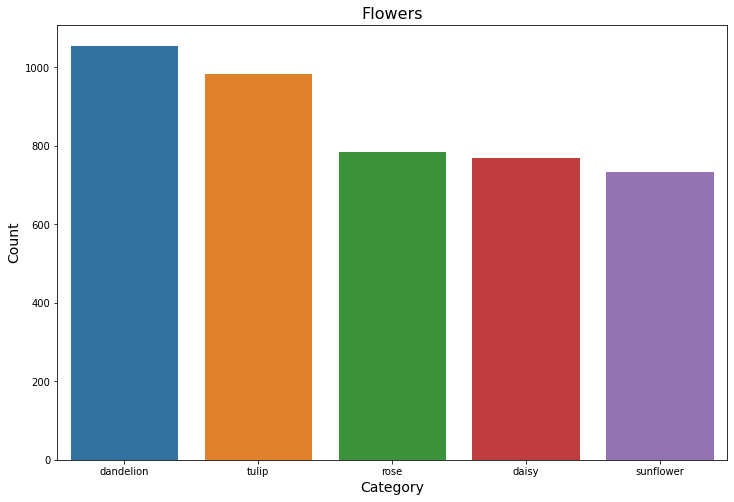

In [30]:
# Let's do some visualization too
plt.figure(figsize=(12,8))
sns.barplot(x=fl_count.index, y=fl_count.values)
plt.title("Flowers", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [11]:
# Build two functions to assign flowers image's categories with pictures 
def assign_label(img,flower_type):
    return flower_type

In [12]:
def train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        labels.append(str(label))

In [13]:
train_data('Daisy',daisy_flowers)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:06<00:00, 113.38it/s]

769


In [14]:
train_data('Sun',sun_flowers)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:02<00:00, 350.18it/s]

1503


In [15]:
train_data('Tulip',tulip_flowers)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:02<00:00, 399.20it/s]

2487


In [16]:
train_data('Rose',rose_flowers)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 424.77it/s]

3271


In [17]:
train_data('Dandelon',dandelion_flowers)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████▊| 1052/1055 [00:07<00:00, 139.26it/s]


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


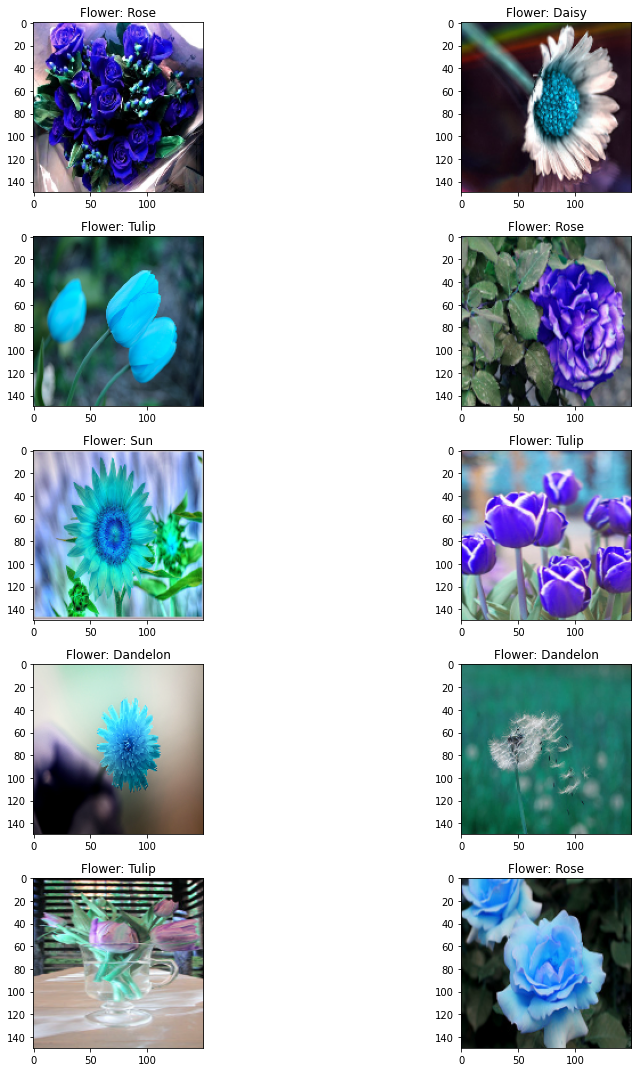

In [18]:
#Random visualisation of flowers 
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+labels[l])
        
plt.tight_layout()

## CNN model 

In [19]:
#Generate training set and validation sets
le=LabelEncoder()
Y=le.fit_transform(labels)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
len(X)

4323

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

First model

In [21]:
# Let's build a CNN using Keras' Sequential capabilities
model = Sequential()
# 5x5 convolution  and 32 filters
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3x3 convolution  and 64 filters
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#3x3 convolution, 2x2 strides  and 64 filters
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
#3x3 convolution, 2x2 strides  and 96 filters
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Another 3x3 convolution, 2x2 strides  and 96 filters
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        5

Annealer
In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

In [22]:
#Lets's train the model 
#the loss function is categorical_crossentropy
#The optimizer function is Adam 
batch_size=128
epochs=50
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [24]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [25]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
Historys= model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

C:\Users\33758\anaconda3\envs\R\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
25/25 [==============================] - 78s 3s/step - loss: 1.5239 - accuracy: 0.2806 - val_loss: 1.2316 - val_accuracy: 0.4459
Epoch 2/50
25/25 [==============================] - 74s 3s/step - loss: 1.2730 - accuracy: 0.4550 - val_loss: 1.1250 - val_accuracy: 0.5449
Epoch 3/50
25/25 [==============================] - 72s 3s/step - loss: 1.1526 - accuracy: 0.5193 - val_loss: 1.0623 - val_accuracy: 0.5837
Epoch 4/50
25/25 [==============================] - 73s 3s/step - loss: 1.0734 - accuracy: 0.5558 - val_loss: 1.0273 - val_accuracy: 0.5800
Epoch 5/50
25/25 [==============================] - 74s 3s/step - loss: 0.9948 - accuracy: 0.6055 - val_loss: 0.9577 - val_accuracy: 0.6253
Epoch 6/50
25/25 [==============================] - 72s 3s/step - loss: 0.9821 - accuracy: 0.6076 - val_loss: 0.9296 - val_accuracy: 0.6355
Epoch 7/50
25/25 [==============================] - 73s 3s/step - loss: 0.9615 - accuracy: 0.6282 - val_loss: 0.9250 - val_accuracy: 0.6096
Epoch 8/50
25/25 [==

### Performance of model

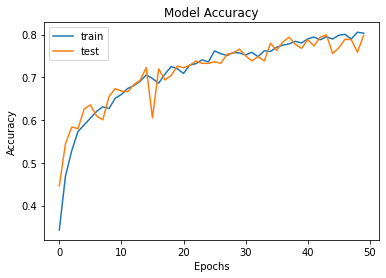

In [28]:
#Let's make a graph that show the acuraccy  for both dataset 
plt.plot(Historys.history['accuracy'])
plt.plot(Historys.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

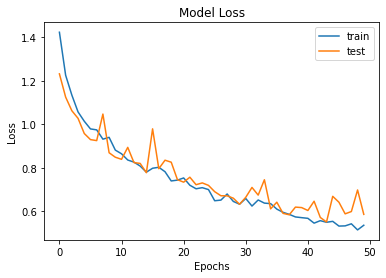

In [29]:
#Let's make a graph that show the loss function for both dataset 
plt.plot(Historys.history['loss'])
plt.plot(Historys.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### VGG model

In [51]:
from keras.applications import VGG16

In [52]:
Base_model = VGG16(include_top= False, weights='imagenet',input_shape=(150,150,3), pooling='avg')
Base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [53]:
model_VGG = Sequential()
model_VGG.add(Base_model)
model_VGG.add(Dense(256,activation='relu'))
# adding prediction(softmax) layer
model_VGG.add(Dense(5,activation="softmax"))

In [54]:
Base_model.trainable = False

In [55]:
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

In [56]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [57]:
model_VGG.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:
model_VGG.compile(optimizer=Adam(lr = 1e-4), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [59]:
batch_size=64
History = model_VGG.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

C:\Users\33758\anaconda3\envs\R\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 319s 6s/step - loss: 1.6015 - accuracy: 0.2607 - val_loss: 1.4608 - val_accuracy: 0.4098
Epoch 2/50
50/50 [==============================] - 339s 7s/step - loss: 1.4061 - accuracy: 0.4645 - val_loss: 1.3183 - val_accuracy: 0.5338
Epoch 3/50
50/50 [==============================] - 329s 7s/step - loss: 1.2799 - accuracy: 0.5560 - val_loss: 1.2171 - val_accuracy: 0.5532
Epoch 4/50
50/50 [==============================] - 327s 7s/step - loss: 1.1748 - accuracy: 0.6142 - val_loss: 1.1102 - val_accuracy: 0.6022
Epoch 5/50
50/50 [==============================] - 329s 7s/step - loss: 1.0858 - accuracy: 0.6319 - val_loss: 1.0437 - val_accuracy: 0.6115
Epoch 6/50
50/50 [==============================] - 315s 6s/step - loss: 1.0177 - accuracy: 0.6531 - val_loss: 0.9877 - val_accuracy: 0.6327
Epoch 7/50
50/50 [==============================] - 308s 6s/step - loss: 0.9685 - accuracy: 0.6662 - val_loss: 0.9415 - val_accuracy: 0.6494
Epoch 8/50
50

## Performance of model VGG

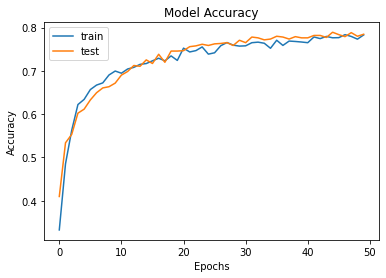

In [60]:
#Let's make a graph that show the acuraccy  for both dataset 
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

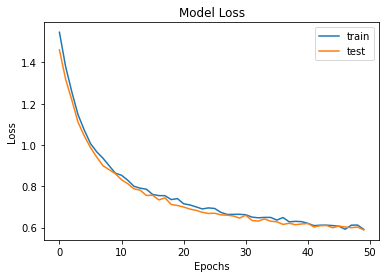

In [61]:
#Let's make a graph that show the loss function for both dataset 
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

By comparing the two models we realize the result are almost the same but the best one is the simple model CNN (79 %)

In [70]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [71]:
good_pred=[]
bad_pred=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        good_pred.append(i)
    if(len(good_pred)==10):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        bad_pred.append(i)
    if(len(bad_pred)==10):
        break

### Visualization of good prediction

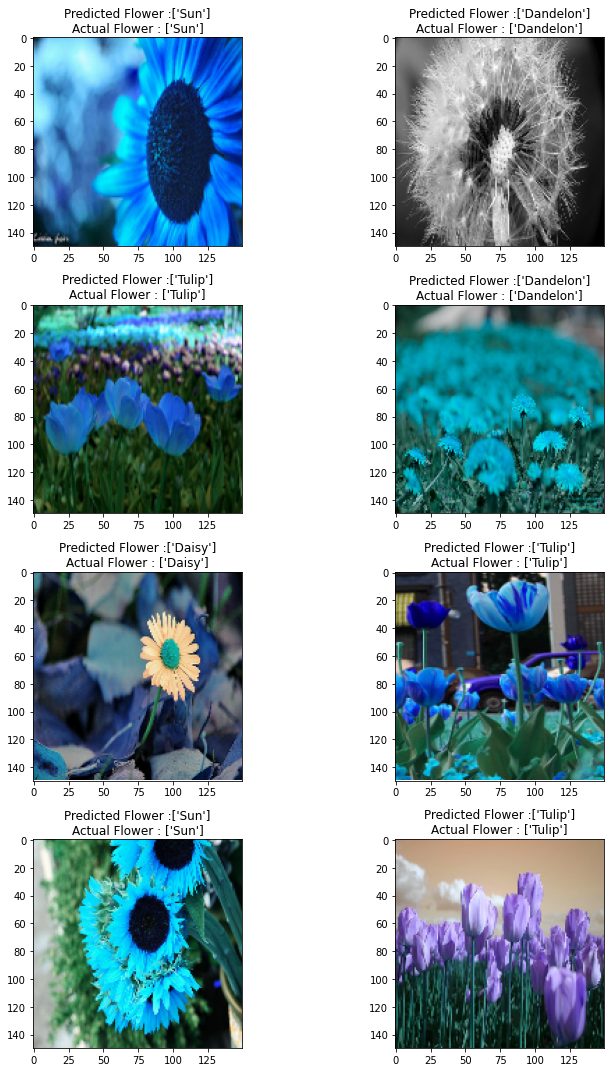

In [72]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[good_pred[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[good_pred[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[good_pred[count]])])))
        plt.tight_layout()
        count+=1

### Visualization of bad prediction

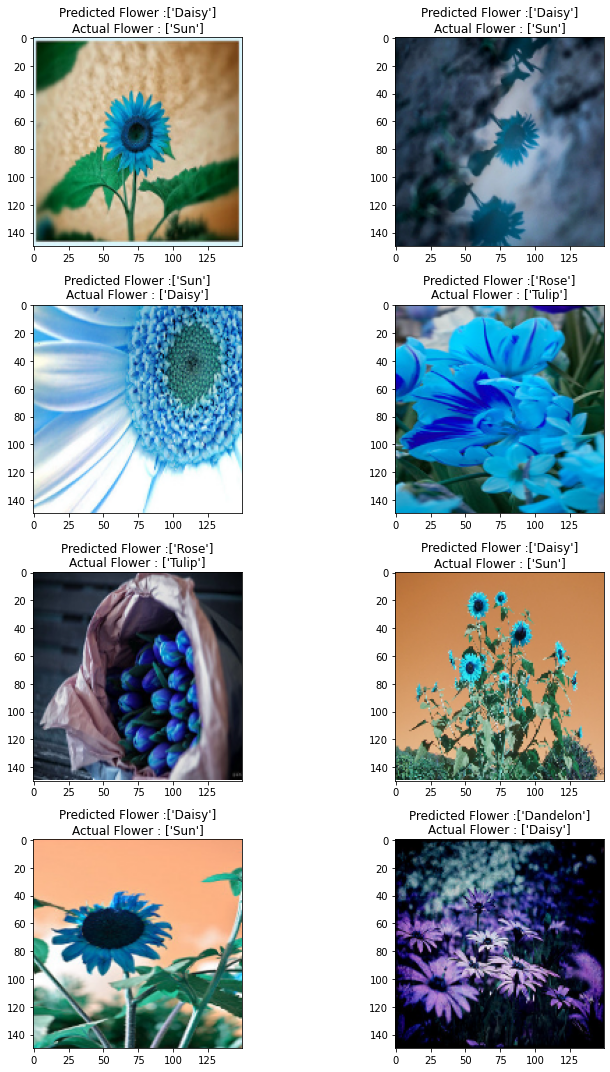

In [73]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[bad_pred[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[bad_pred[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[bad_pred[count]])])))
        plt.tight_layout()
        count+=1

## General overview of prediction

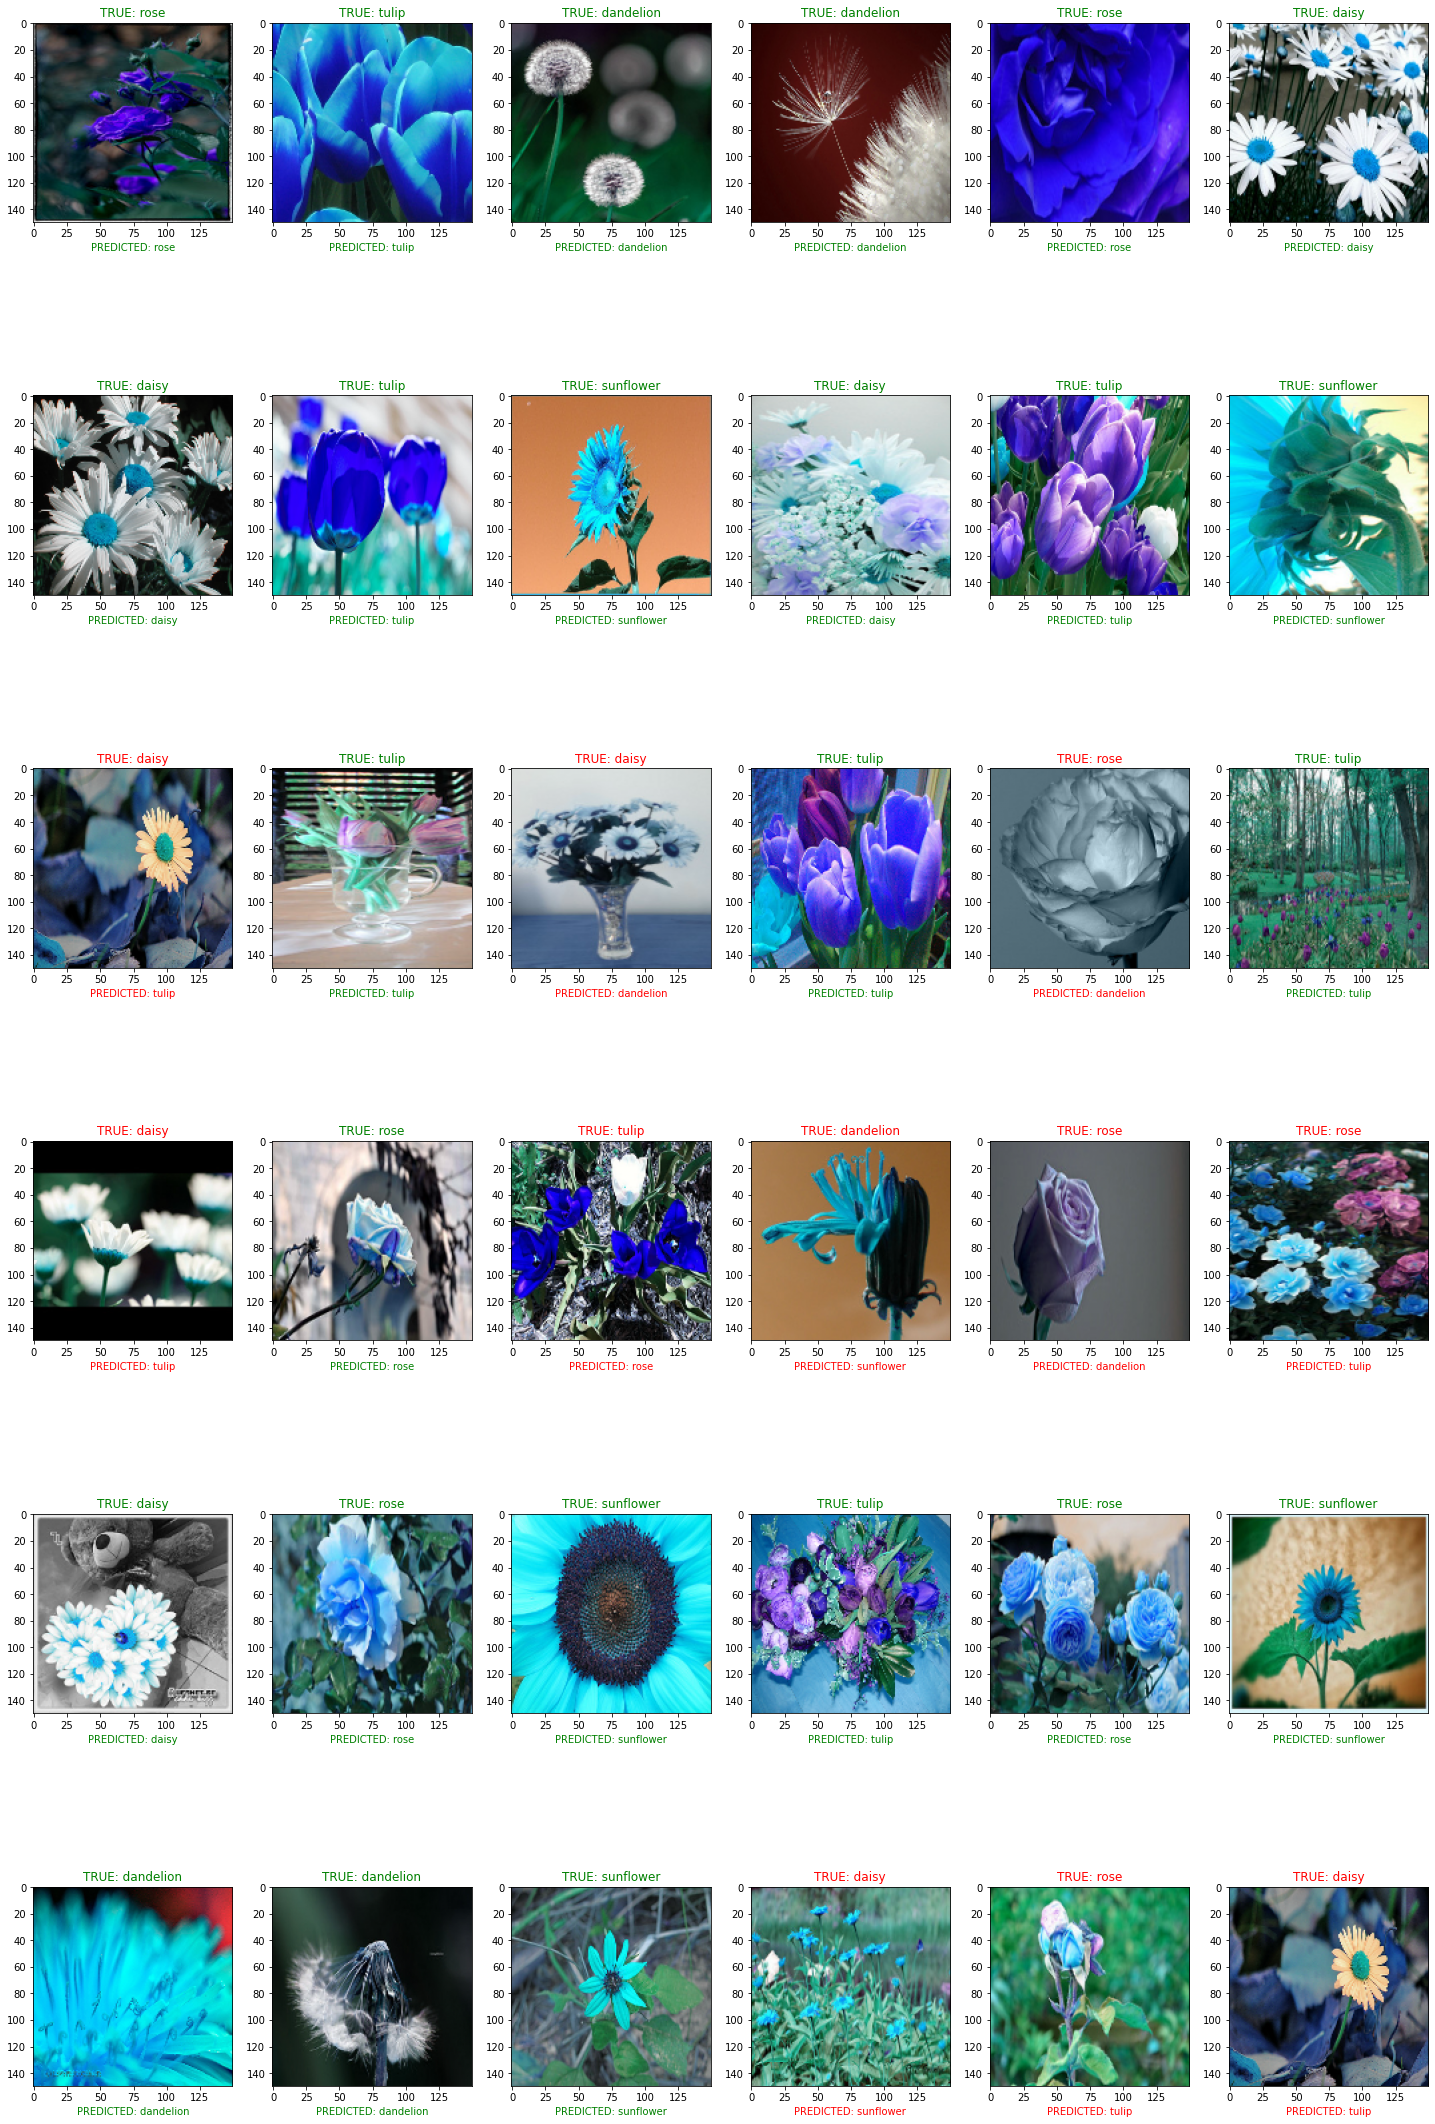

In [27]:
SIZE=150
folder_dir=r'C:/Users/33758/Desktop/Freedel ZINSOU PLY/Coursera/flowers/flowers'
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

### Conclusion

The objective of this model was to classify and predict the name of each flower associate  with his  image, and the results show that this objective was achieved.We use two model, a simple model of CNN and a model  with a VGG16 achitecture model. Finally we choose the simple model because , it's train better than VGG16 and the result on test dataset is better too.
The model predicts well with both training and validation models. The loss function used minimises the errors as much as possible, which facilitates learning and thus increases the accuracy of the model 80 % for training dataset and 79% for validation dataset.